<a href="https://colab.research.google.com/github/eyvonne/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Jesse_Otradovec_and_Eyve_Geo_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior=.001, prob_false_positive=.01, prob_true_positive=.99):

  prob_drunk=(prob_true_positive*prob_drunk_prior)/(prob_true_positive*prob_drunk_prior+prob_false_positive*(1-prob_drunk_prior))

  return prob_drunk

In [2]:
prob_drunk_given_positive()

0.09016393442622951

In [3]:
prob_drunk_given_positive(prob_drunk_given_positive(prob_drunk_given_positive()))

0.9989714794017902

In [4]:
prob_drunk_given_positive(prob_drunk_given_positive())

0.9075000000000001

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
col=['Party',
  "handicapped-infants",
  "water-project-cost-sharing",
  "adoption-of-the-budget-resolution",
  'physician-fee-freeze',
  'el-salvador-aid',
  'religious-groups-in-schools',
  'anti-satellite-test-ban',
  'aid-to-nicaraguan-contras',
  'mx-missile',
  'immigration',
  'synfuels-corporation-cutback',
  'education-spending',
  'superfund-right-to-sue',
  'crime',
  'duty-free-exports',
  'export-administration-act-south-africa',]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=col, na_values="?")
col[1:]

['handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

In [6]:
df=df.replace({"y":1,
              'n':0})
df.head()
            

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

In [0]:
from scipy import stats
?stats.bayes_mvs

In [0]:
republican = df[df['Party']=="republican"]
democrat = df[df['Party']=='democrat']

In [9]:
 means=pd.DataFrame({
     'republican':republican.mean(),
     'democrat':democrat.mean()
 })
 means

,republican,democrat
handicapped-infants,0.187879,0.604651
water-project-cost-sharing,0.506757,0.502092
adoption-of-the-budget-resolution,0.134146,0.888462
physician-fee-freeze,0.987879,0.054054
el-salvador-aid,0.951515,0.215686
religious-groups-in-schools,0.897590,0.476744
anti-satellite-test-ban,0.240741,0.772201
aid-to-nicaraguan-contras,0.152866,0.828897
mx-missile,0.115152,0.758065
immigration,0.557576,0.471483


In [10]:
issues = col[1:]
for issue in issues:
  t,p=stats.ttest_ind(democrat[issue],republican[issue], nan_policy='omit')
  
  if p<.05:
    support=list(means.loc[issue])
    if support[0]>support[1]:
      print("Republicans support "+issue+" more.")
      mean, var, std, = stats.bayes_mvs(republican[issue].dropna(), alpha=.95)
      print("The mean is:"+str(mean)) 
      print("The variance is:"+str(var))
      print("The standard deviation is:"+str(std))
      print(" ")
    else:
      print("Democrats support "+issue+" more.")
      mean, var, std, = stats.bayes_mvs(democrat[issue].dropna(), alpha=.95)
      print("The mean is:"+str(mean)) 
      print("The variance is:"+str(var))
      print("The standard deviation is:"+str(std))
      print(" ")

  else:
    print("There is bipartisan support/lack of support for "+issue)
    print(" ")



Democrats support handicapped-infants more.
The mean is:Mean(statistic=0.6046511627906976, minmax=(0.5445926997425515, 0.6647096258388437))
The variance is:Variance(statistic=0.24186046511627907, minmax=(0.20334567221093322, 0.2875424084350645))
The standard deviation is:Std_dev(statistic=0.4913111995028866, minmax=(0.4509386568159057, 0.536229809349559))
 
There is bipartisan support/lack of support for water-project-cost-sharing
 
Democrats support adoption-of-the-budget-resolution more.
The mean is:Mean(statistic=0.8884615384615384, minmax=(0.8499435153340716, 0.9269795615890052))
The variance is:Variance(statistic=0.10025441484585453, minmax=(0.08434639072625345, 0.11911026270760343))
The standard deviation is:Std_dev(statistic=0.3163219205956206, minmax=(0.2904245009055769, 0.3451235470199091))
 
Republicans support physician-fee-freeze more.
The mean is:Mean(statistic=0.9878787878787879, minmax=(0.9710067448304756, 1.0047508309271003))
The variance is:Variance(statistic=0.0121960

In [0]:
import statsmodels.stats

In [20]:
#wrap up getting the bayes margin into a function
def bayesMargin(data):
  data=data.dropna()
  mean,_,_=stats.bayes_mvs(data, alpha=.95)
  return (mean[1][1]-mean[0])

#make a function for getting the frequentest solution
def freqMargin(data, confidence=.95):
  data=data.dropna()
  n=len(list(data))
  avg=data.mean()
  std=np.std(data, ddof=1)
  err=stats.sem(data)
  margin=err*stats.t.ppf((1+confidence)/2.0, n-1)
  return margin

for issue in issues:
  print(bayesMargin(democrat[issue]))
  print(freqMargin(democrat[issue]))
  print("")

0.060058463048146105
0.060058463048146146

0.06384690925692016
0.06384690925692016

0.03851802312746677
0.03851802312746677

0.027722192556845215
0.02772219255684521

0.05082316051000674
0.050823160510006744

0.06135235940902922
0.06135235940902927

0.05141875056420786
0.051418750564207825

0.04581281695310058
0.04581281695310053

0.05367050496847958
0.05367050496847958

0.060725449142464416
0.060725449142464444

0.06177965146996067
0.06177965146996066

0.04398337302973643
0.043983373029736435

0.056389437030609224
0.05638943703060922

0.05871276143220927
0.058712761432209284

0.059881489230642626
0.059881489230642675

0.03582176924929492
0.03582176924929492



In [0]:
def margin(issue, partyDF, confidence=.95):
  avg = means[party].loc[issue]
  std_dev=np.std(partyDF[issue], ddof=1)
  st_err=std_dev/(len(list(partyDF[issue])))
  margin=st_err * stats.t.ppf((1+confidence)/2, (len(list(partyDF[issue]))-1))
  return margin

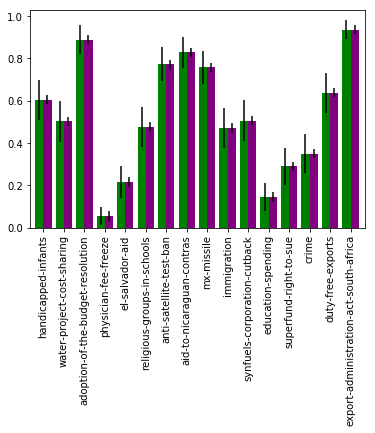

In [16]:
fig, ax = plt.subplots()
means.democrat.plot(kind='bar', position=0, width=.4, color='purple', yerr=bayesMargin(democrat[issues]))
means.democrat.plot(kind='bar', position=1, width=.4, color='green', yerr=freqMargin(democrat[issues]))
plt.xlim(right=15.7)
plt.show()


In [0]:
stats.bayes_mvs(democrat['aid-to-nicaraguan-contras'].dropna())[0][1]

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
In your own words, summarize the difference between Bayesian and Frequentist statistics

Frequentist statistics rely solely on the data at hand while bayesian statistics also pulls in domain knowledge to help to inform the conclusion

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)